# Gerenciamento de Dependências

In [49]:
# Upgrade do pip
!pip install --upgrade pip

# Instalação dos pacotes
!pip install gdown # Serve pra baixar arquivos do google drive
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install missingno
!pip install matplotlib
!pip install scikit-learn
!pip install xgboost

In [2]:
# Import dos Pacotes
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from scipy.stats import chi2_contingency
from xgboost import XGBClassifier

# Download do Dataset

In [3]:
!gdown 1ISRC99c1SyDwpsWh5E8OjSMtxpd6ux22

Downloading...
From: https://drive.google.com/uc?id=1ISRC99c1SyDwpsWh5E8OjSMtxpd6ux22
To: /home/julio/Documentos/faculdade_ia_machine-learning-and-n8n/sods.csv
100%|████████████████████████████████████████| 849k/849k [00:00<00:00, 1.99MB/s]


# Visualização dos Dados

## Funções Auxiliares

## Plots
***
Idade: label com dados númericos, não categóricos. Devo analisar a distribuição, os valores assumidos, o número de valores faltando e, a existência de outliers. Suponho, que algo entre 1 ano à 122 anos, que foi a idade de uma senhorinha que viveu que só, vou usar 125 pra arredondar.

Genêro: label com dados textuais e, categóricos. Devo analisar a distribuição, os valores assumidos e, o número de valores faltando. Suponho, que seja masculino, feminino e outros. Vou precisar fazer o encode, posteriormente.

Etnia:  label com dados textuais e, categóricos. Devo analisar a distribuição, os valores assumidos e, o número de valores faltando. Suponho, que seja parda, branca e negra. Vou precisar fazer o encode, posteriormente.

PCD (Pessoa com Deficiência): label com dados binários, sim ou não. Devo analisar a distribuição, os valores assumidos e, o número de valores faltando. Vou precisar fazer o encode, posteriormente.

Vive no Brasil: label com dados binários, True ou False. Devo analisar a distribuição, os valores assumidos e, o número de valores faltando. Vou precisar fazer o encode, posteriormente.

Estado de moradia: label com dados textuais e, categóricos. Devo analisar a distribuição, os valores assumidos e, o número de valores faltando. Devo verificar também se a label assume valores de estados fora do Brasil. Vou precisar fazer o encode, posteriormente.

Nível de ensino:

Formação:

Tempo de experiência:

Linguagens preferidas:

Banco de dados:

Cloud preferida:

Cargo:
***

In [3]:
# Carregar o dataset e ver algumas informações básicas
dataset = pd.read_csv("sods.csv") 
dataset

,idade,genero,etnia,pcd,vive_no_brasil,estado_moradia,nivel_ensino,formacao,tempo_experiencia_dados,linguagens_preferidas,bancos_de_dados,cloud_preferida,cargo
0,39.0,Masculino,Parda,Não,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 1 a 2 anos,R,"PostgreSQL, Oracle, MySQL, SQL SERVER",Amazon Web Services (AWS),DBA/Administrador de Banco de Dados
1,32.0,Masculino,Parda,Não,True,Pará (PA),Graduação/Bacharelado,Outras Engenharias,de 3 a 4 anos,NaN,NaN,NaN,NaN
2,53.0,Masculino,Branca,Não,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,Python,"PostgreSQL, MySQL, Oracle, DB2",Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...
3,27.0,Masculino,Branca,Não,True,Minas Gerais (MG),Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,de 4 a 6 anos,Python,Google BigQuery,Não sei opinar,Cientista de Dados/Data Scientist
4,46.0,Feminino,Branca,Não,True,Pará (PA),Pós-graduação,Computação / Engenharia de Software / Sistemas...,Não tenho experiência na área de dados,Python,Microsoft Access,Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,26.0,Masculino,Branca,Não,True,São Paulo (SP),Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,Python,"PostgreSQL, Oracle, MariaDB, HBase, MySQL",Não sei opinar,Analista de Dados/Data Analyst
4267,30.0,Feminino,Branca,Não,True,Minas Gerais (MG),Mestrado,Outras Engenharias,de 1 a 2 anos,Python,"SQL SERVER, SAP HANA",Azure (Microsoft),Engenheiro de Dados/Arquiteto de Dados/Data En...
4268,29.0,Masculino,Branca,Não,True,São Paulo (SP),Mestrado,Outras Engenharias,de 4 a 6 anos,NaN,NaN,NaN,NaN
4269,NaN,Masculino,Branca,Não,True,São Paulo (SP),Não tenho graduação formal,NaN,Menos de 1 ano,Python,"Microsoft Access, Oracle",Azure (Microsoft),Outra Opção


Removendo todas as linhas em que valores do target estiverem faltando.

In [4]:
target = "cargo"
dataset = dataset.dropna(subset=[target])
dataset

,idade,genero,etnia,pcd,vive_no_brasil,estado_moradia,nivel_ensino,formacao,tempo_experiencia_dados,linguagens_preferidas,bancos_de_dados,cloud_preferida,cargo
0,39.0,Masculino,Parda,Não,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 1 a 2 anos,R,"PostgreSQL, Oracle, MySQL, SQL SERVER",Amazon Web Services (AWS),DBA/Administrador de Banco de Dados
2,53.0,Masculino,Branca,Não,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,Python,"PostgreSQL, MySQL, Oracle, DB2",Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...
3,27.0,Masculino,Branca,Não,True,Minas Gerais (MG),Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,de 4 a 6 anos,Python,Google BigQuery,Não sei opinar,Cientista de Dados/Data Scientist
4,46.0,Feminino,Branca,Não,True,Pará (PA),Pós-graduação,Computação / Engenharia de Software / Sistemas...,Não tenho experiência na área de dados,Python,Microsoft Access,Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...
5,32.0,Feminino,Parda,Não,True,Ceará (CE),Pós-graduação,Ciências Biológicas/ Farmácia/ Medicina/ Área ...,Não tenho experiência na área de dados,Python,Google BigQuery,Google Cloud (GCP),Professor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4265,28.0,Masculino,Branca,Não,True,Paraná (PR),Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,Julia,SQLite,Azure (Microsoft),Analista de Marketing
4266,26.0,Masculino,Branca,Não,True,São Paulo (SP),Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,Python,"PostgreSQL, Oracle, MariaDB, HBase, MySQL",Não sei opinar,Analista de Dados/Data Analyst
4267,30.0,Feminino,Branca,Não,True,Minas Gerais (MG),Mestrado,Outras Engenharias,de 1 a 2 anos,Python,"SQL SERVER, SAP HANA",Azure (Microsoft),Engenheiro de Dados/Arquiteto de Dados/Data En...
4269,NaN,Masculino,Branca,Não,True,São Paulo (SP),Não tenho graduação formal,NaN,Menos de 1 ano,Python,"Microsoft Access, Oracle",Azure (Microsoft),Outra Opção


In [5]:
dataset["formacao"]

0       Computação / Engenharia de Software / Sistemas...
2       Computação / Engenharia de Software / Sistemas...
3       Estatística/ Matemática / Matemática Computaci...
4       Computação / Engenharia de Software / Sistemas...
5       Ciências Biológicas/ Farmácia/ Medicina/ Área ...
                              ...                        
4265    Computação / Engenharia de Software / Sistemas...
4266    Computação / Engenharia de Software / Sistemas...
4267                                   Outras Engenharias
4269                                                  NaN
4270    Computação / Engenharia de Software / Sistemas...
Name: formacao, Length: 2981, dtype: object

In [6]:
dataset["bancos_de_dados"]

0           PostgreSQL, Oracle, MySQL, SQL SERVER
2                  PostgreSQL, MySQL, Oracle, DB2
3                                 Google BigQuery
4                                Microsoft Access
5                                 Google BigQuery
                          ...                    
4265                                       SQLite
4266    PostgreSQL, Oracle, MariaDB, HBase, MySQL
4267                         SQL SERVER, SAP HANA
4269                     Microsoft Access, Oracle
4270                 Oracle, Firebird, SQL SERVER
Name: bancos_de_dados, Length: 2981, dtype: object

In [7]:
# Garantir cópia
dataset = dataset.copy()

# Transformar strings em listas (tratando regex corretamente)
dataset['bancos_list'] = dataset['bancos_de_dados'].str.split(r',\s*')

# Substituir NaN ou valores não-lista por lista vazia
dataset['bancos_list'] = dataset['bancos_list'].apply(lambda x: x if isinstance(x, list) else [])

# One-hot encode
mlb = MultiLabelBinarizer()
bancos_encoded = mlb.fit_transform(dataset['bancos_list'])

# Criar DataFrame com colunas one-hot
bancos_df = pd.DataFrame(bancos_encoded, columns=mlb.classes_, index=dataset.index)

# Substituir coluna original
dataset = dataset.drop(columns='bancos_de_dados')
dataset = pd.concat([dataset, bancos_df], axis=1)
dataset = dataset.drop(columns='bancos_list')

Número de valores faltando.
idade: 38 -> 0.89%
genero: 6 -> 0.14%
etnia: 0 -> 0.00%
pcd: 0 -> 0.00%
vive_no_brasil: 0 -> 0.00%
estado_moradia: 72 -> 1.69%
nivel_ensino: 0 -> 0.00%
formacao: 74 -> 1.73%
tempo_experiencia_dados: 0 -> 0.00%
linguagens_preferidas: 2 -> 0.05%
cloud_preferida: 0 -> 0.00%
cargo: 0 -> 0.00%
.CSV: 0 -> 0.00%
API: 0 -> 0.00%
Access: 0 -> 0.00%
Amazon Athena: 0 -> 0.00%
Amazon Aurora ou RDS: 0 -> 0.00%
Amazon Redshift: 0 -> 0.00%
Autonomous DB: 0 -> 0.00%
Azue Blob Storage: 0 -> 0.00%
Azure: 0 -> 0.00%
Azure ADLS: 0 -> 0.00%
Azure Blob Storage: 0 -> 0.00%
Azure Data Explorer: 0 -> 0.00%
Azure Data Lake: 0 -> 0.00%
Azure Data lake: 0 -> 0.00%
Azure SQL: 0 -> 0.00%
Azure Storage Account: 0 -> 0.00%
Azure Synapse: 0 -> 0.00%
Azure blob storage: 0 -> 0.00%
B.O SAP: 0 -> 0.00%
Banco de dados próprio da empresa: 0 -> 0.00%
Base de dados local: 0 -> 0.00%
Base interna: 0 -> 0.00%
Bases Excel e csv extraídas direto no site: 0 -> 0.00%
BigQuery: 0 -> 0.00%
BigTable: 0 -> 

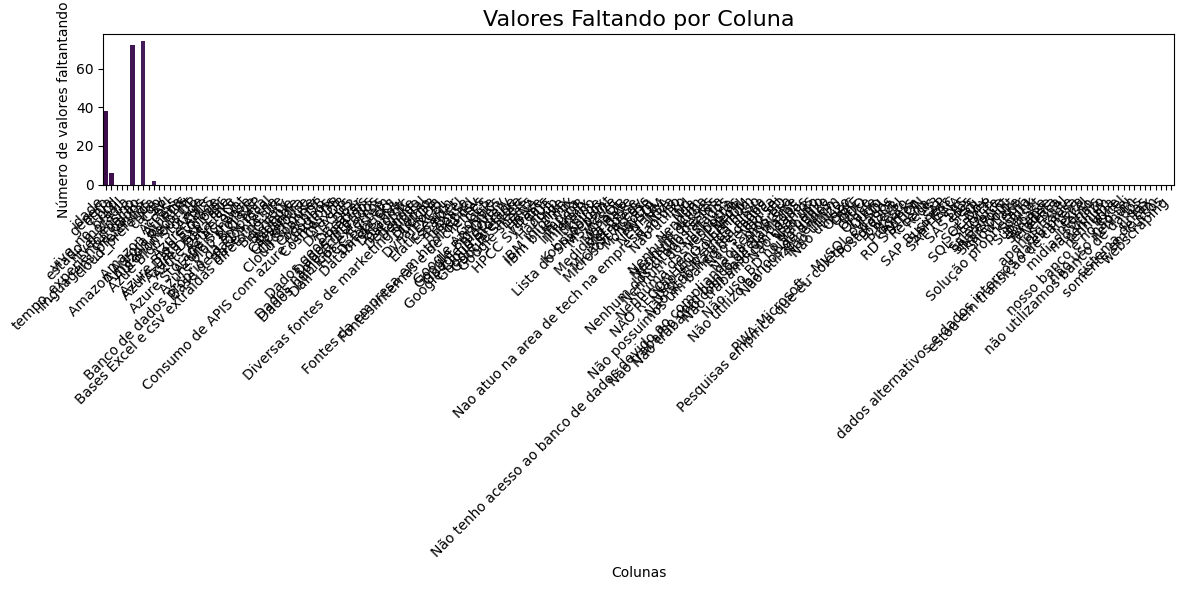

In [8]:
# Verificar o  número de valores ausentes nas tabelas.

missing_counts = dataset.isnull().sum().reset_index()
missing_counts.columns = ["coluna", "valores_faltantes"]

print("Número de valores faltando.")
for col, val in dataset.isnull().sum().items():
    print(f"{col}: {val} -> {val/4271*100:.2f}%")

plt.figure(figsize=(12,6))
sns.barplot(data=missing_counts, 
            x="coluna", 
            y="valores_faltantes",
            hue="coluna",
            palette="viridis",
            legend=False,
            dodge=False)

plt.xticks(rotation=45, ha='right')
plt.title("Valores Faltando por Coluna", fontsize=16)
plt.xlabel("Colunas")
plt.ylabel("Número de valores faltantando")
plt.tight_layout()
plt.show()

# Pode ser uma boa printar também o número geral de linhas que possui pelo menos um valor faltando.

In [9]:
dataset["MySQL"]

0       1
2       1
3       0
4       0
5       0
       ..
4265    0
4266    1
4267    0
4269    0
4270    0
Name: MySQL, Length: 2981, dtype: int64

In [10]:
sinonimos = {
    "Nenhum": [
        "NENHUM", "Nao uso", "Nao utilizo", "Nd", "Nda", "Nenhum", 
        "Nenhum acima", "Nenhum desses", "Nenhum destes", "Nenhum dos citados acima", 
        "Nenhum dos listados", "Nenhuma", "Nenhuma das respostas", "NÃO RECONHEÇO NENHUM", 
        "Não Utilizo nenhum", "Não atuo ainda nisso", "Não atuo na área ainda", 
        "Não possuímos um banco de dados.", "Não se aplica", "Não sei", "Não temos BD", 
        "Não tenho acesso ao banco de dados devido ao compliance da empresa", 
        "Não trabalho com banco diretamente", "Não trabalho com base de dados.", 
        "Não trabalho com dados", "Não usamos", "Não uso", "Não uso BD no trabalho", 
        "Não utilizo", "Não utilizo bancos de dados.", "Não utilizo nenhum", 
        "Não utilizo.", "Não utiluzo", "nao utilizo", "nenhum", "nenhuma", 
        "não sei", "não uso nenhum", "não utilizamos banco de dados", "Nao atuo na area de tech na empresa ainda",
        "Nao uso", "Nao utilizo", "Nda", "Nenhum", "Nenhuma", "Não trabalho com dados",
        "Não usamos", "Não uso", "Não utilizo", "não uso nenhum", "não utilizamos banco de dados"
    ],
    "Excel": [
        "EXCEL", "Excel", "apenas Excel", "nosso banco é no excel", "excel",
        "Bases Excel e csv extraídas direto no site", "Office", "Fontes da empresa em html ou csv"
    ],
    "Google BigQuery": [
        "BigQuery", "Google BigQuery", "Google Big Query", "Google BigQuery"
    ],
    "SQL Server": [
        "MSSQL", "SQL SERVER", "SQL Dbx"
    ],
    "Azure Blob Storage": [
        "Azue Blob Storage", "Azure Blob Storage", "Azure blob storage"
    ],
    "Google Sheets": [
        "Google Sheets", "Google sheets"
    ],
    "Bigtable": [
        "BigTable", "Bigtable", "big table"
    ],
    "Clickhouse": [
        "ClickHouse", "Clickhouse"
    ],
    "Azure Data Lake": [
        "Azure Data Lake", "Azure Data lake", "Azure ADLS", "Azure Data Lake"
    ],
    "Dados internos": [
        "Base de dados local", "Base interna", "Dados internos", "interno", "internos",
        "Fontes internas e de clientes", "Solução proprietária", "Banco de dados próprio da empresa"
    ],
    "Não aplicável": [
        "estou em transição de carreira", "somente em cursos", "não trabalho com dados",
        "Não trabalho com base de dados.", "Não trabalho com dados"
    ]
}

for padrao, cols in sinonimos.items():
    # Pega só as colunas que realmente existem no dataset
    cols_existentes = [c for c in cols if c in dataset.columns]
    if not cols_existentes:
        continue

    # Cria a coluna mesclada
    dataset[padrao] = dataset[cols_existentes].max(axis=1)

    # Remove duplicadas
    dataset = dataset.drop(columns=cols_existentes)

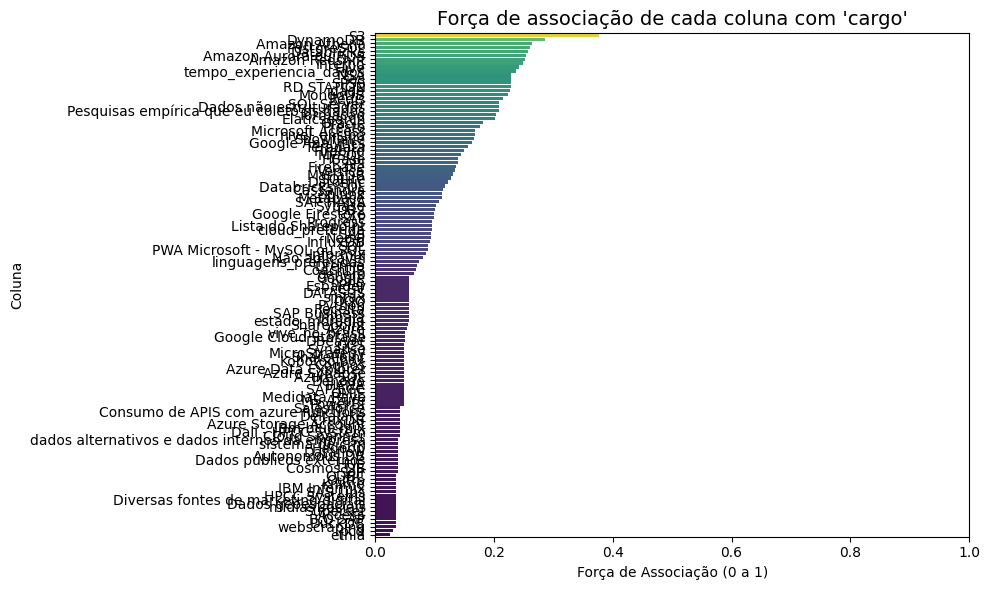

In [11]:
# ----- Funções auxiliares -----
def cramers_v_corrected(x, y):
    """Associação categórico↔categórico"""
    conf = pd.crosstab(x, y)
    if conf.size == 0:
        return np.nan
    chi2 = chi2_contingency(conf)[0]
    n = conf.to_numpy().sum()
    if n == 0:
        return np.nan
    phi2 = chi2 / n
    r, k = conf.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1)) if n > 1 else 0
    rcorr = r - ((r - 1)**2) / (n - 1) if n > 1 else r
    kcorr = k - ((k - 1)**2) / (n - 1) if n > 1 else k
    denom = min((kcorr - 1), (rcorr - 1))
    return np.sqrt(phi2corr / denom) if denom > 0 else 0.0

def correlation_ratio(categories, measurements):
    """Associação numérico↔categórico"""
    mask = (~pd.isna(categories)) & (~pd.isna(measurements))
    if mask.sum() == 0:
        return np.nan
    categories = pd.Series(categories[mask], dtype="category")
    measurements = measurements[mask]
    overall_mean = measurements.mean()
    means = measurements.groupby(categories, observed=False).mean()
    counts = measurements.groupby(categories, observed=False).count()
    ss_between = (counts * (means - overall_mean)**2).sum()
    ss_total = ((measurements - overall_mean)**2).sum()
    return float(np.sqrt(ss_between / ss_total)) if ss_total != 0 else 0.0

# ----- Cálculo das associações com o target -----
associacoes = []

for col in dataset.columns:
    if col == target:
        continue
    if pd.api.types.is_numeric_dtype(dataset[col]) and col != "vive_no_brasil":
        # numérico × categórico
        assoc = correlation_ratio(dataset[target], dataset[col])
    else:
        # categórico × categórico
        assoc = cramers_v_corrected(dataset[target], dataset[col])
    associacoes.append({"coluna": col, "associacao": assoc})

assoc_df = pd.DataFrame(associacoes).sort_values(by="associacao", ascending=False)

# ----- Plot -----
plt.figure(figsize=(10,6))
sns.barplot(data=assoc_df,
            x="associacao", 
            y="coluna", 
            hue="associacao",
            palette="viridis",
            legend=False,
            dodge=False)
plt.title(f"Força de associação de cada coluna com '{target}'", fontsize=14)
plt.xlabel("Força de Associação (0 a 1)")
plt.ylabel("Coluna")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

In [12]:
association_threshold = 0.1

for i in associacoes:
    if i["associacao"] > association_threshold:
        print(i)
        
for i in associacoes:
    if i["associacao"] < association_threshold:
        dataset = dataset.drop(columns=[i["coluna"]])        

{'coluna': 'idade', 'associacao': 0.22639994032240207}
{'coluna': 'nivel_ensino', 'associacao': np.float64(0.16716073267183829)}
{'coluna': 'formacao', 'associacao': np.float64(0.20269829127570554)}
{'coluna': 'tempo_experiencia_dados', 'associacao': np.float64(0.23652638179895927)}
{'coluna': 'API', 'associacao': 0.13884830744589416}
{'coluna': 'Amazon Athena', 'associacao': 0.26315812986854936}
{'coluna': 'Amazon Aurora ou RDS', 'associacao': 0.2534857614316371}
{'coluna': 'Amazon Redshift', 'associacao': 0.2513582132591239}
{'coluna': 'Cassandra', 'associacao': 0.1143572843753121}
{'coluna': 'DB2', 'associacao': 0.10128797613806972}
{'coluna': 'Dados não estruturados', 'associacao': 0.20774330415248665}
{'coluna': 'Databricks', 'associacao': 0.2573746526831173}
{'coluna': 'Databricks SQL', 'associacao': 0.1181310191260953}
{'coluna': 'Datomic', 'associacao': 0.12229465424616706}
{'coluna': 'DynamoDB', 'associacao': 0.2861513245299232}
{'coluna': 'Elaticsearch', 'associacao': 0.20199

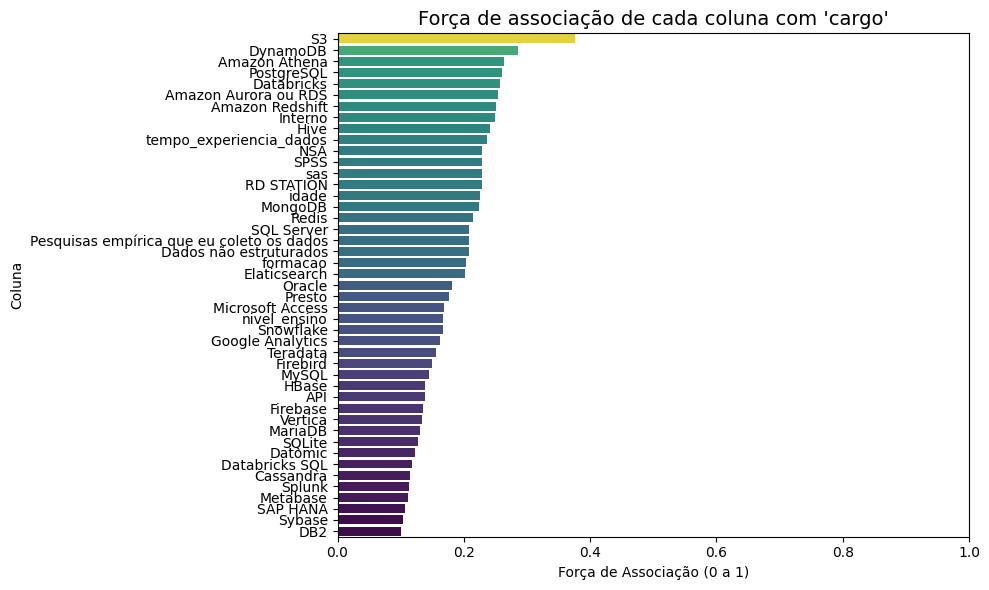

In [13]:
# ----- Funções auxiliares -----
def cramers_v_corrected(x, y):
    """Associação categórico↔categórico"""
    conf = pd.crosstab(x, y)
    if conf.size == 0:
        return np.nan
    chi2 = chi2_contingency(conf)[0]
    n = conf.to_numpy().sum()
    if n == 0:
        return np.nan
    phi2 = chi2 / n
    r, k = conf.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1)) if n > 1 else 0
    rcorr = r - ((r - 1)**2) / (n - 1) if n > 1 else r
    kcorr = k - ((k - 1)**2) / (n - 1) if n > 1 else k
    denom = min((kcorr - 1), (rcorr - 1))
    return np.sqrt(phi2corr / denom) if denom > 0 else 0.0

def correlation_ratio(categories, measurements):
    """Associação numérico↔categórico"""
    mask = (~pd.isna(categories)) & (~pd.isna(measurements))
    if mask.sum() == 0:
        return np.nan
    categories = pd.Series(categories[mask], dtype="category")
    measurements = measurements[mask]
    overall_mean = measurements.mean()
    means = measurements.groupby(categories, observed=False).mean()
    counts = measurements.groupby(categories, observed=False).count()
    ss_between = (counts * (means - overall_mean)**2).sum()
    ss_total = ((measurements - overall_mean)**2).sum()
    return float(np.sqrt(ss_between / ss_total)) if ss_total != 0 else 0.0

# ----- Cálculo das associações com o target -----
associacoes = []

for col in dataset.columns:
    if col == target:
        continue
    if pd.api.types.is_numeric_dtype(dataset[col]) and col != "vive_no_brasil":
        # numérico × categórico
        assoc = correlation_ratio(dataset[target], dataset[col])
    else:
        # categórico × categórico
        assoc = cramers_v_corrected(dataset[target], dataset[col])
    associacoes.append({"coluna": col, "associacao": assoc})

assoc_df = pd.DataFrame(associacoes).sort_values(by="associacao", ascending=False)

# ----- Plot -----
plt.figure(figsize=(10,6))
sns.barplot(data=assoc_df,
            x="associacao", 
            y="coluna", 
            hue="associacao",
            palette="viridis",
            legend=False,
            dodge=False)
plt.title(f"Força de associação de cada coluna com '{target}'", fontsize=14)
plt.xlabel("Força de Associação (0 a 1)")
plt.ylabel("Coluna")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

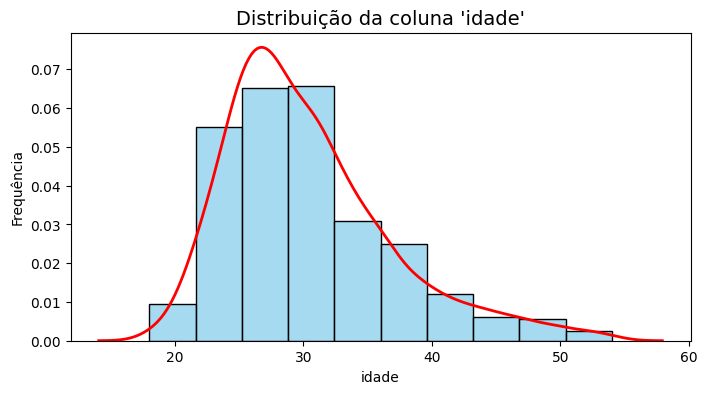

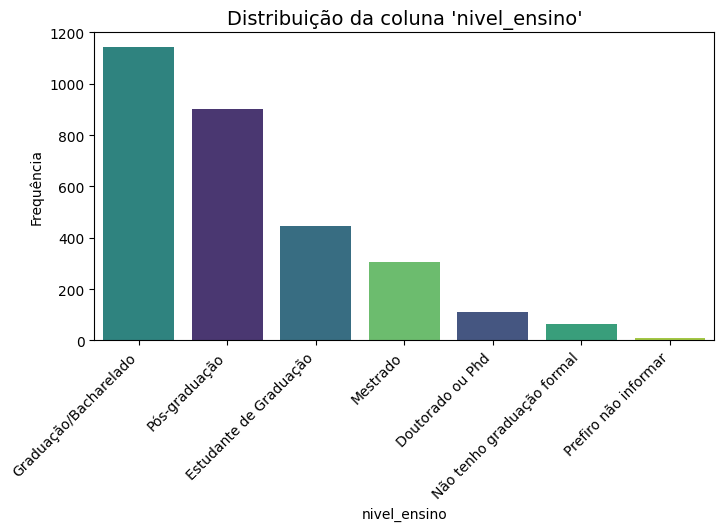

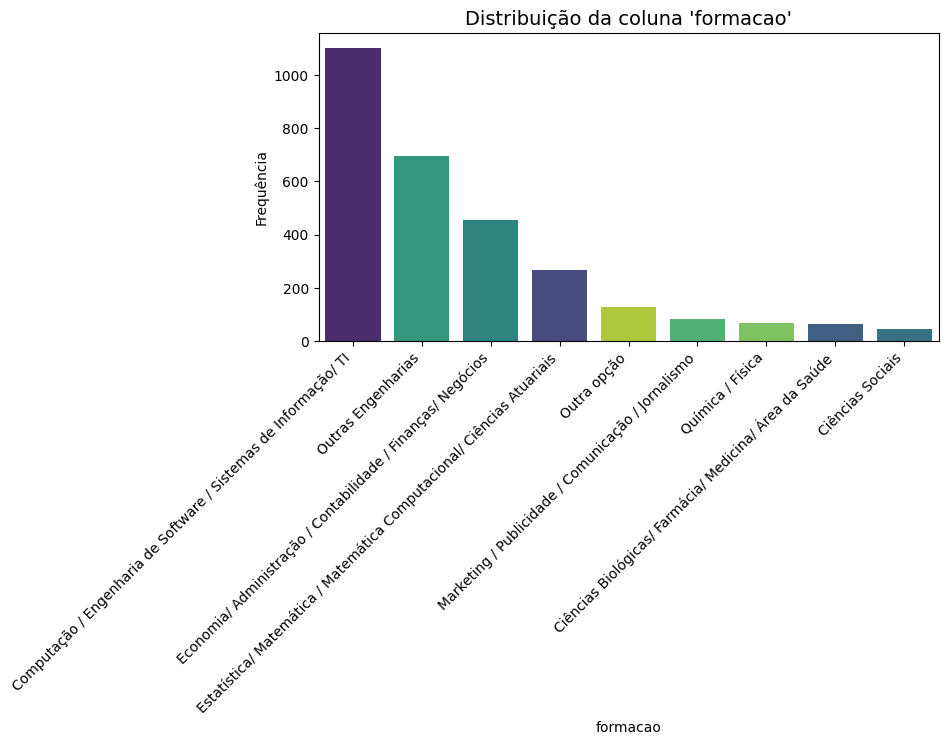

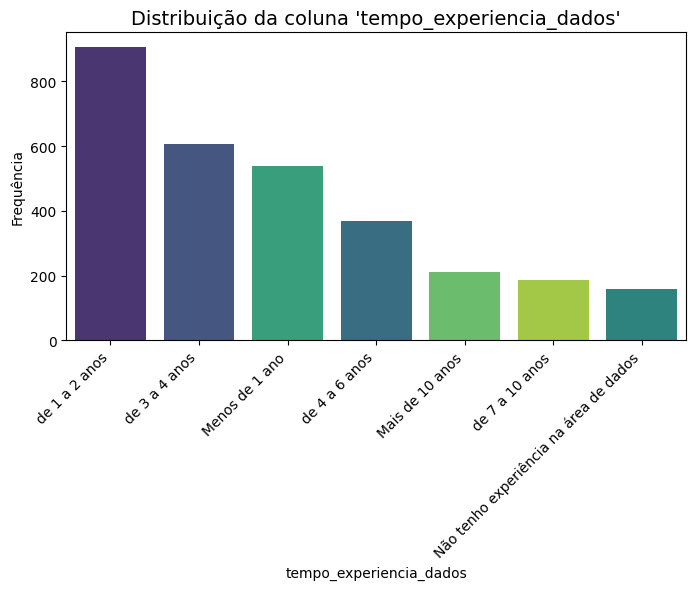

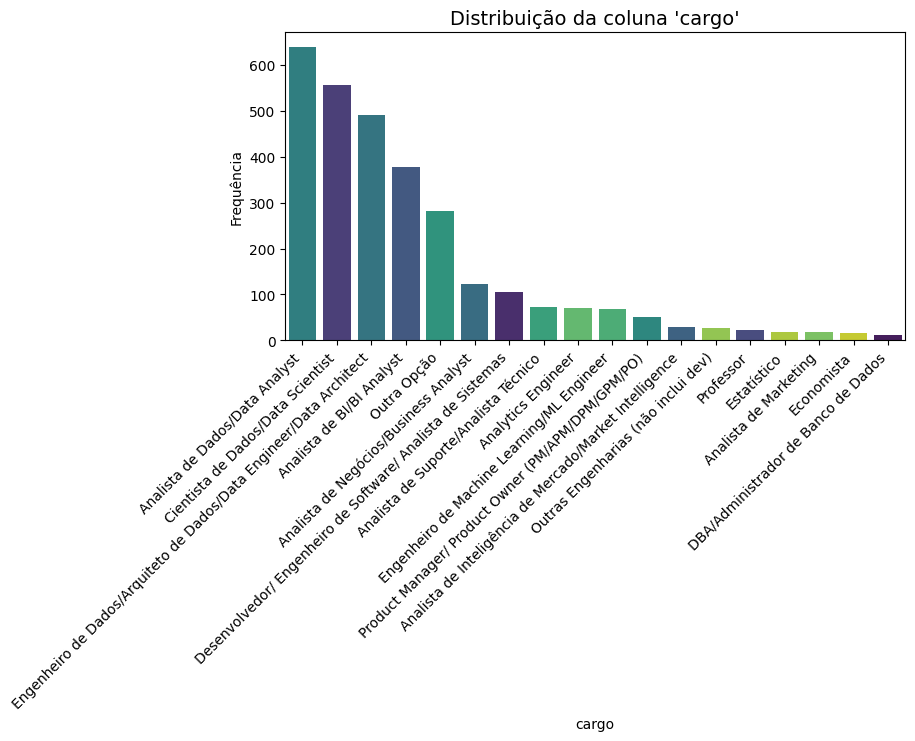

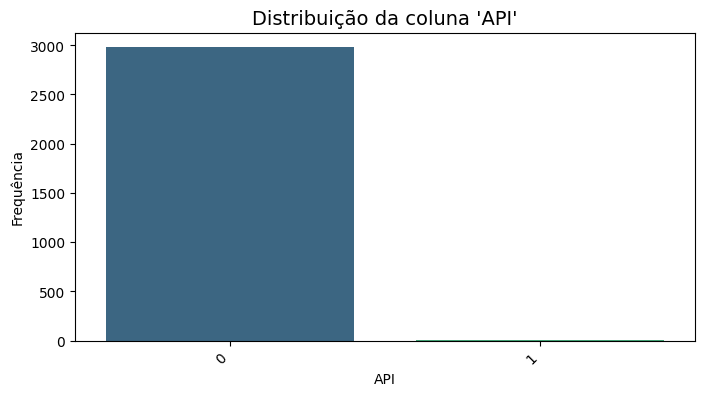

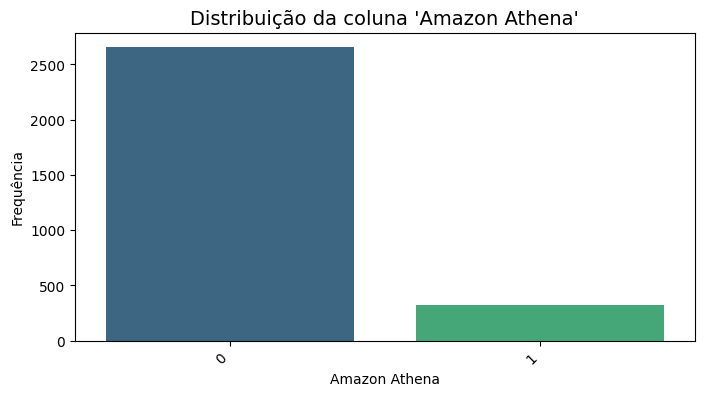

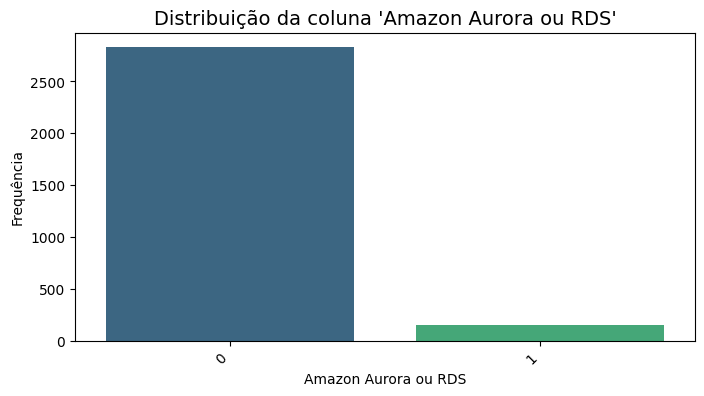

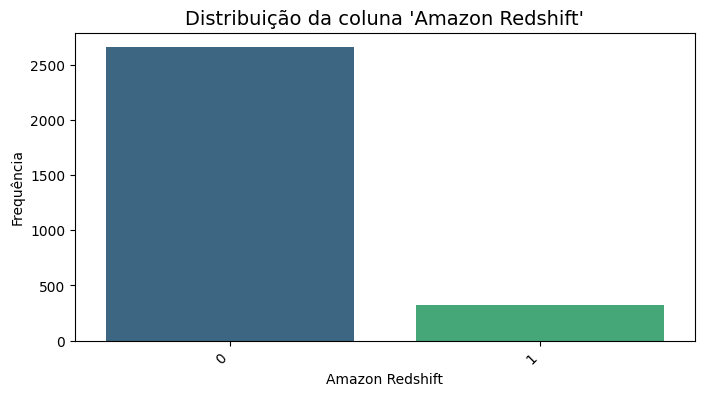

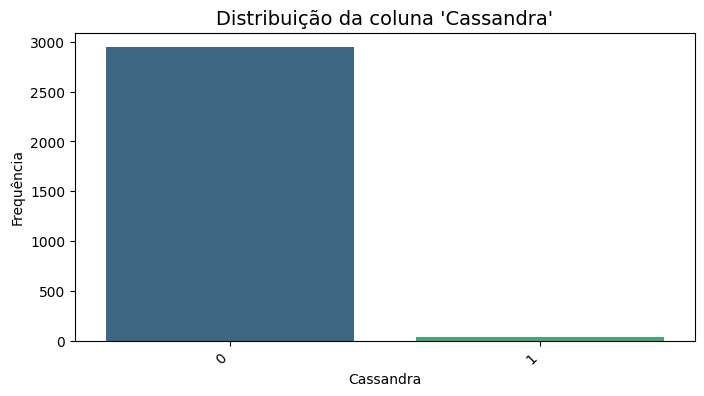

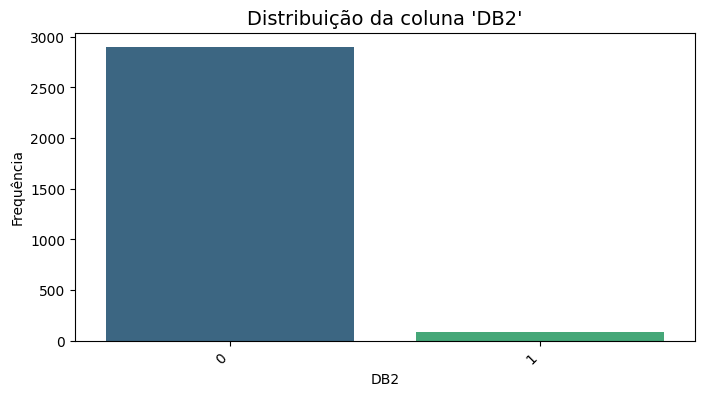

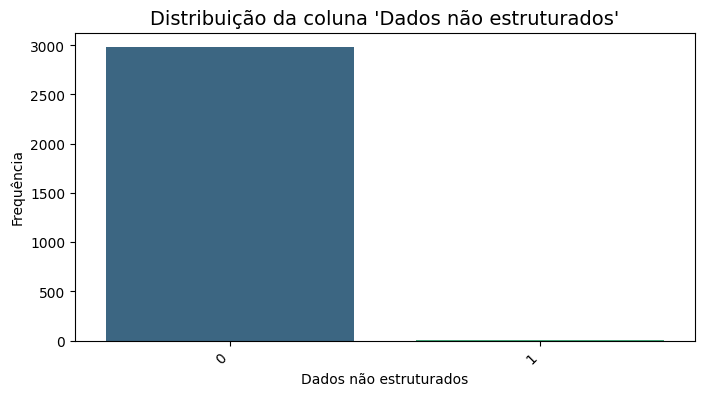

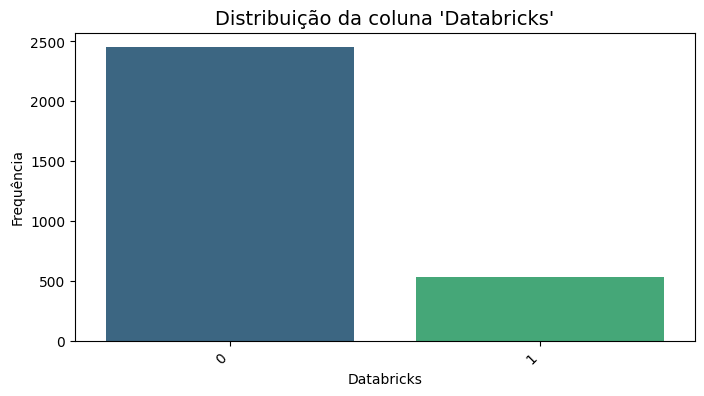

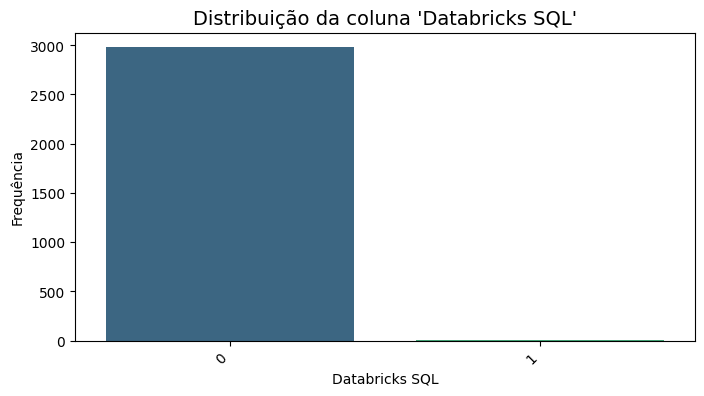

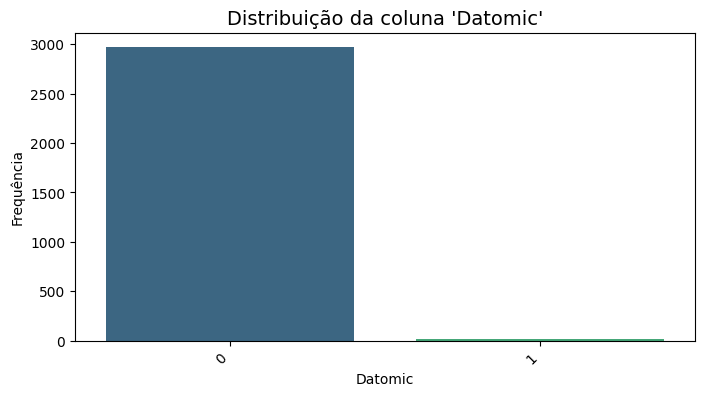

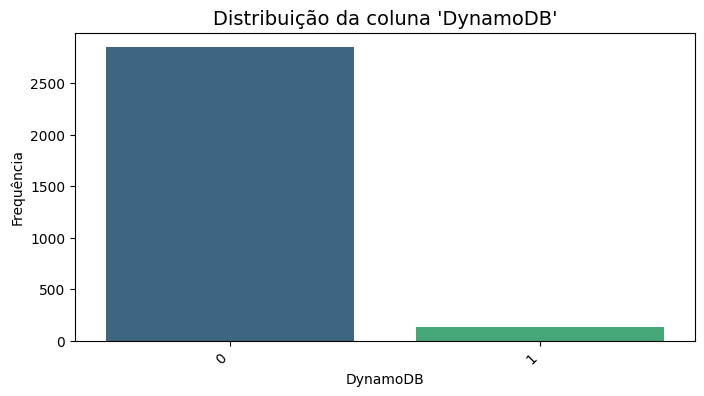

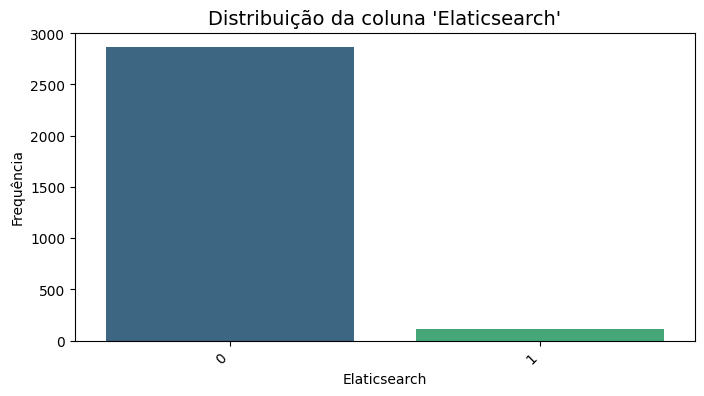

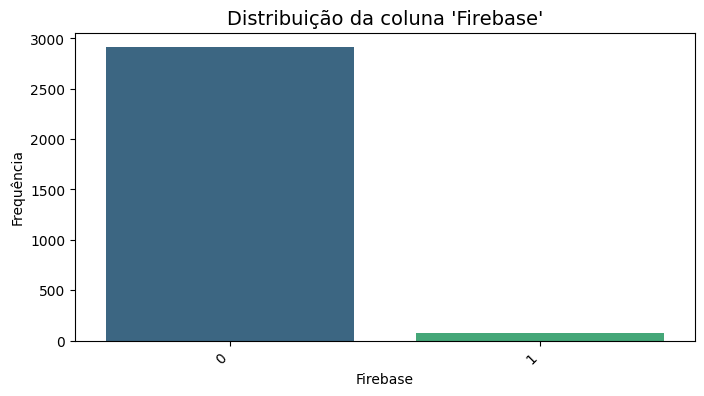

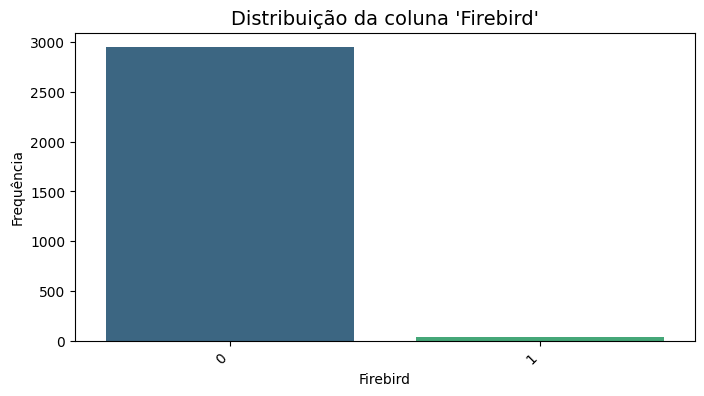

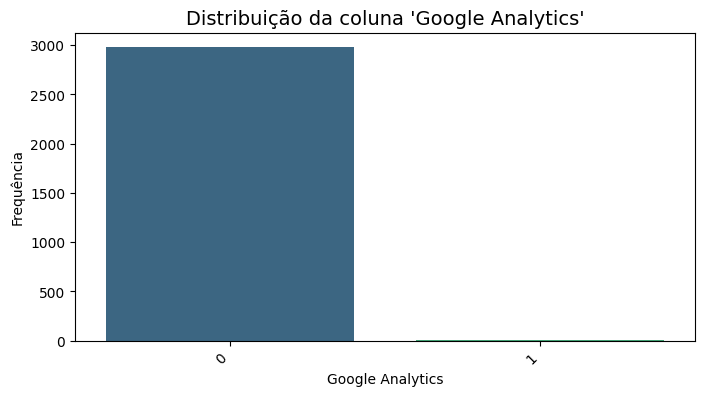

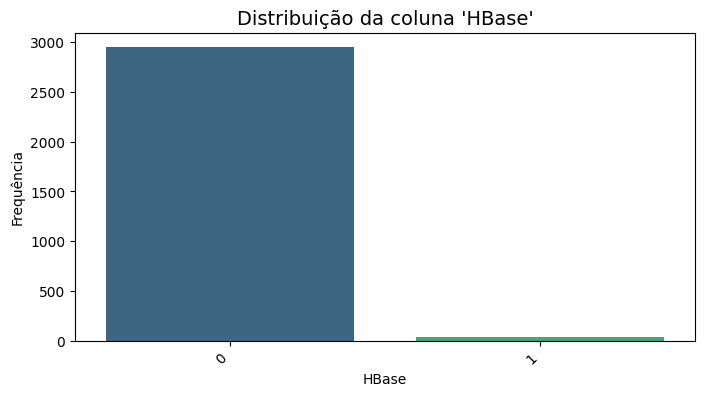

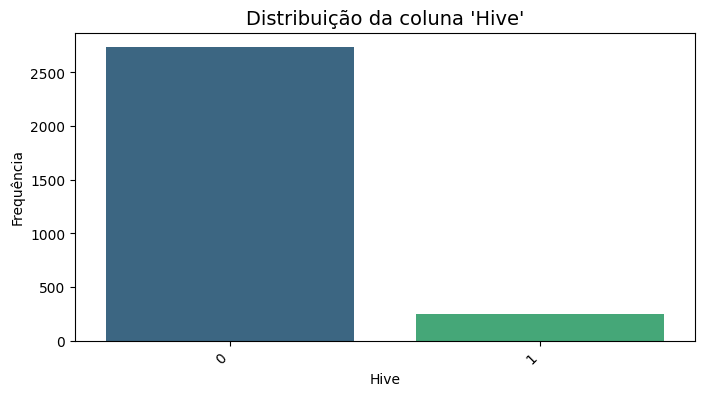

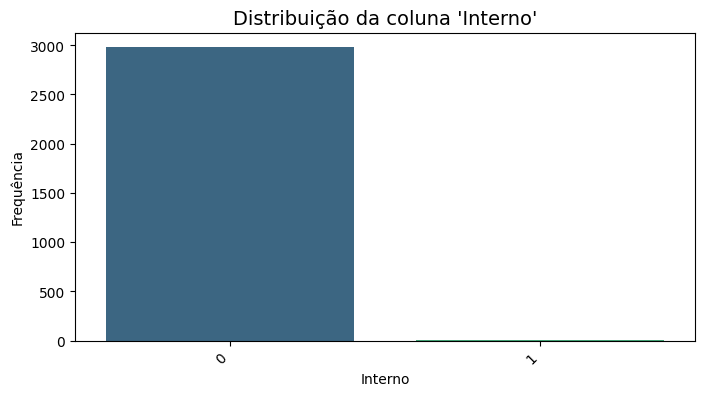

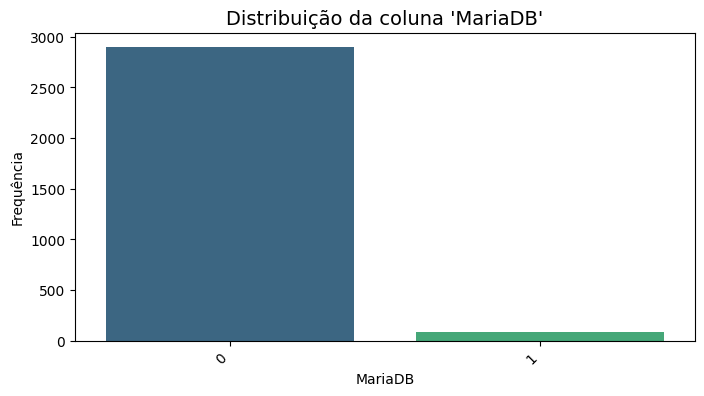

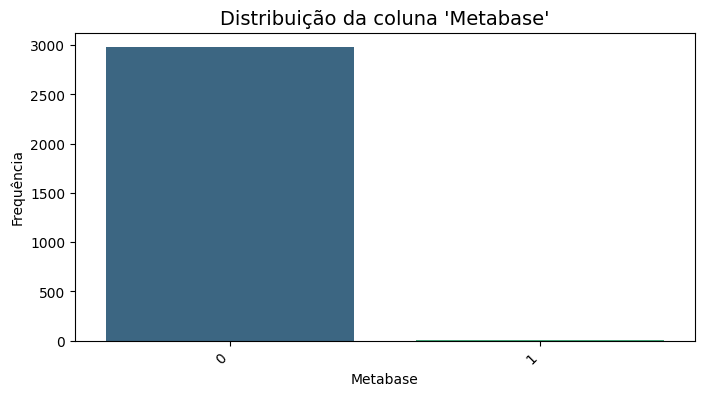

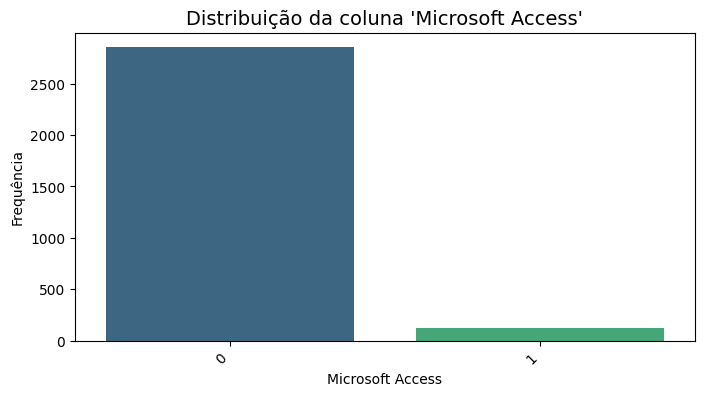

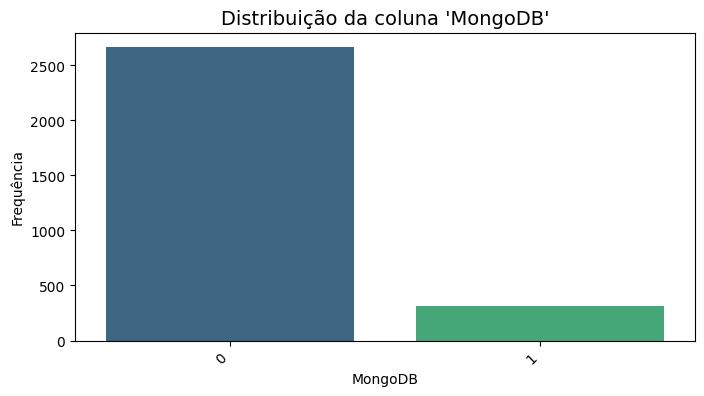

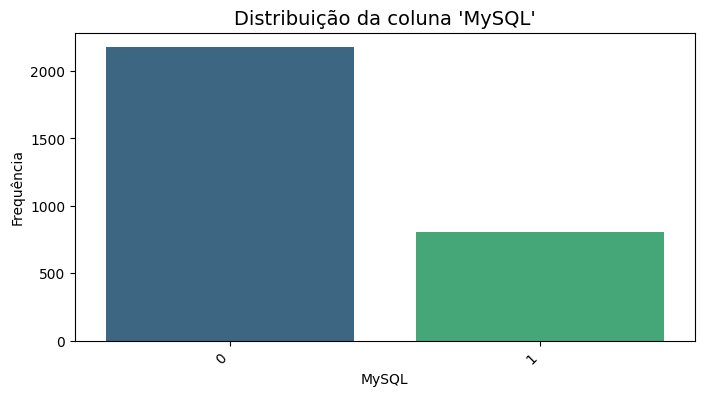

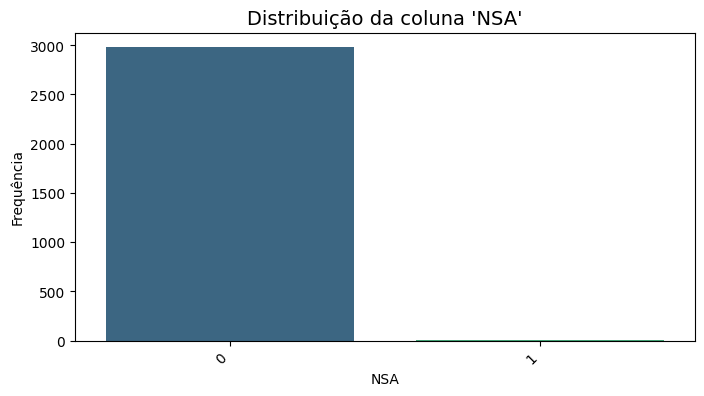

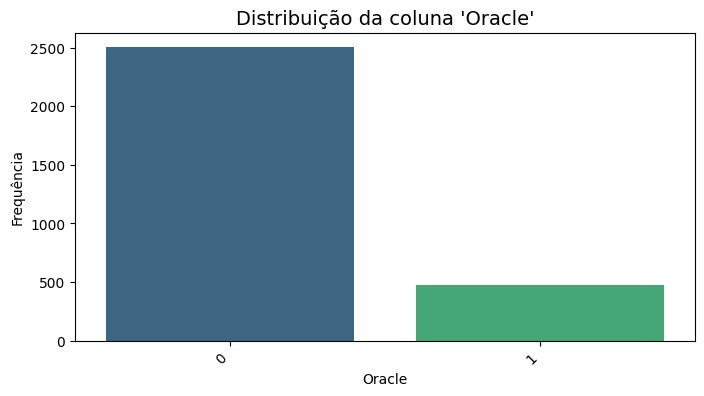

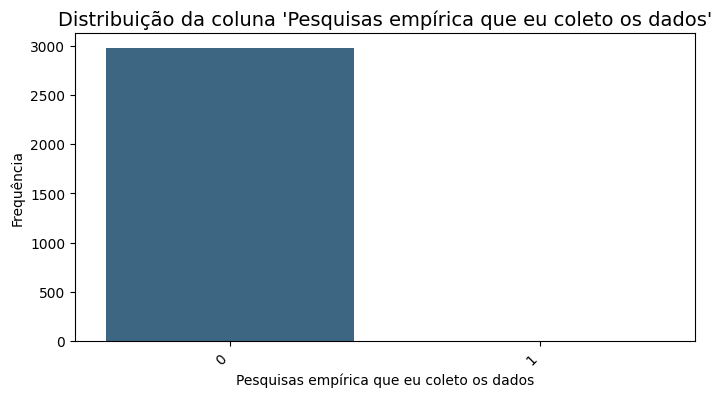

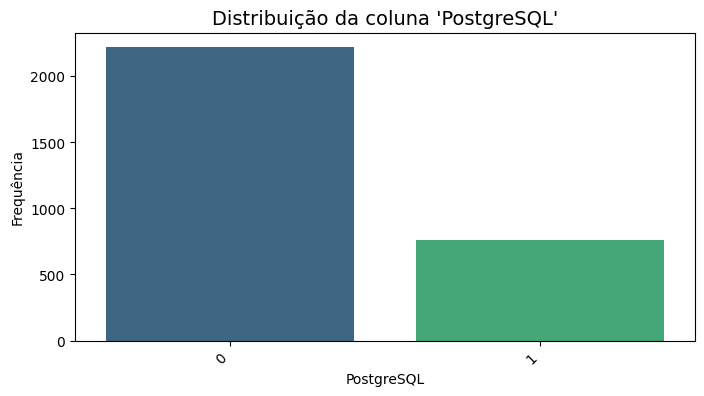

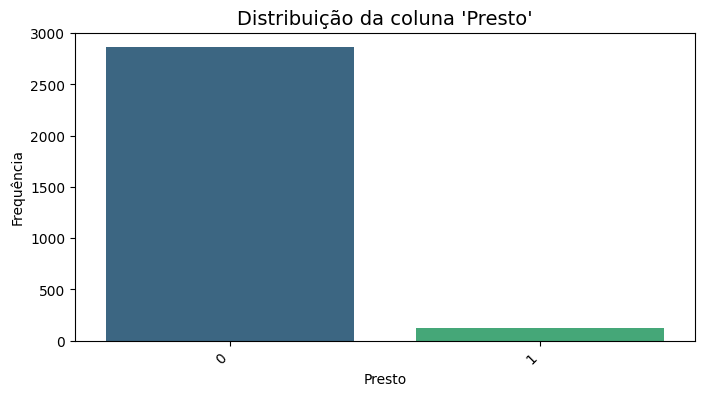

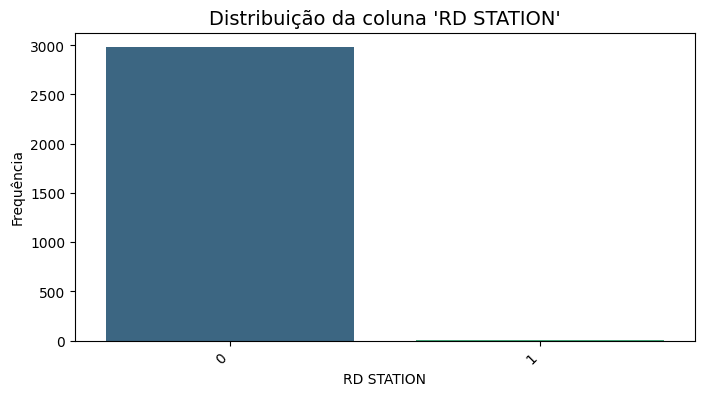

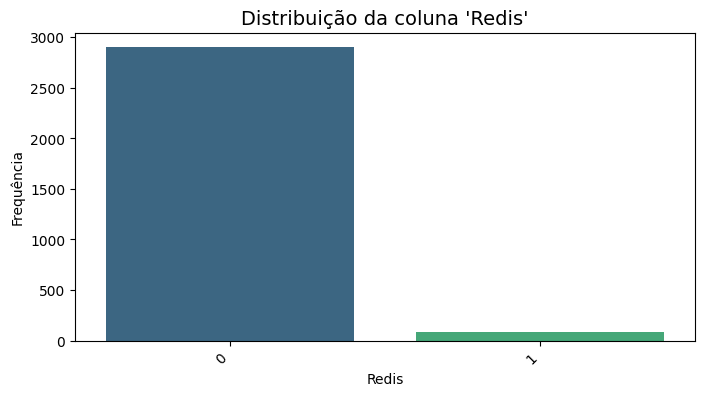

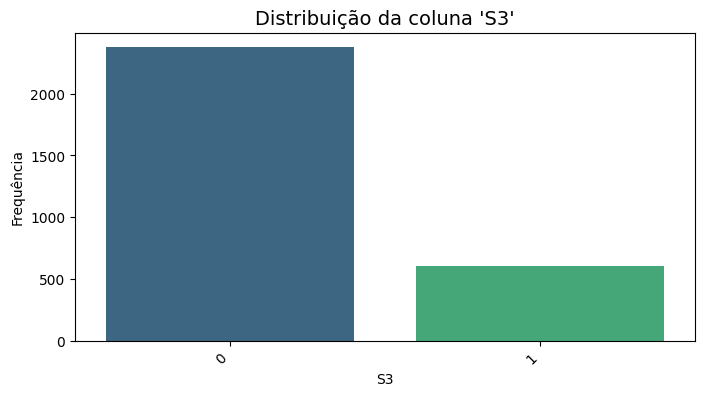

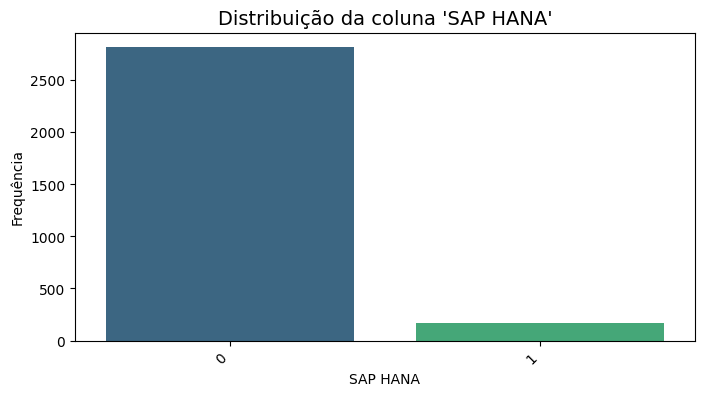

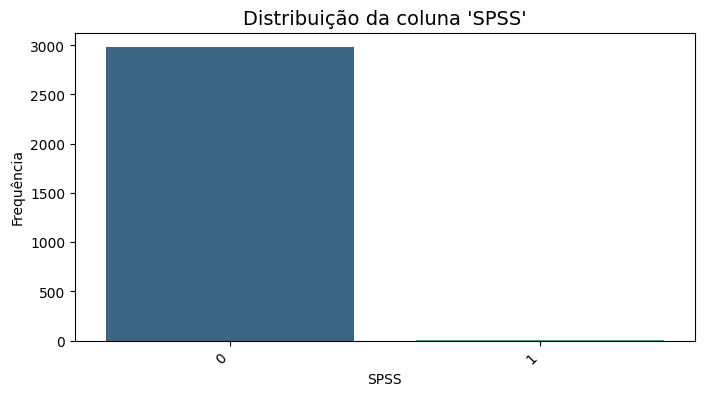

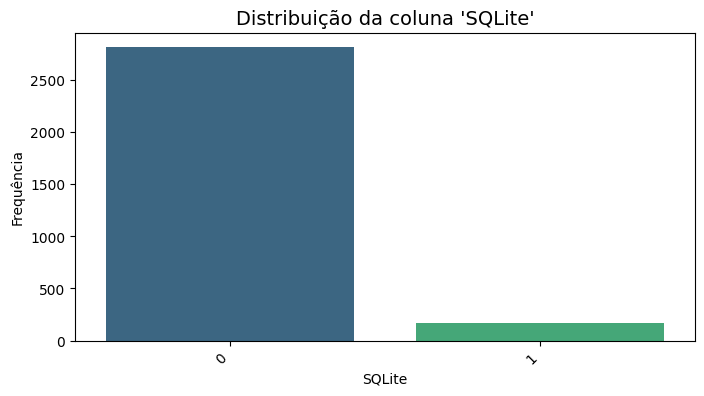

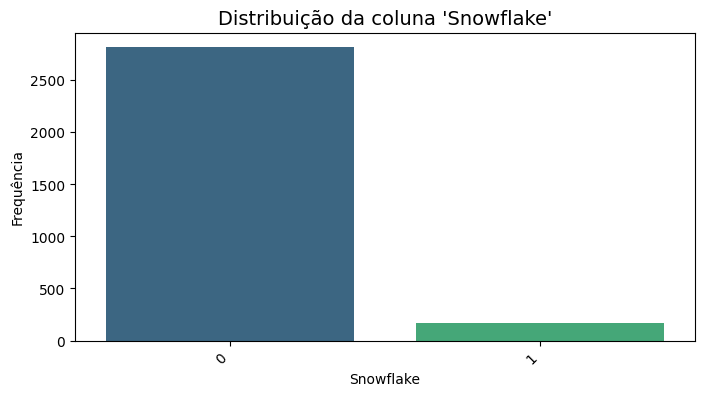

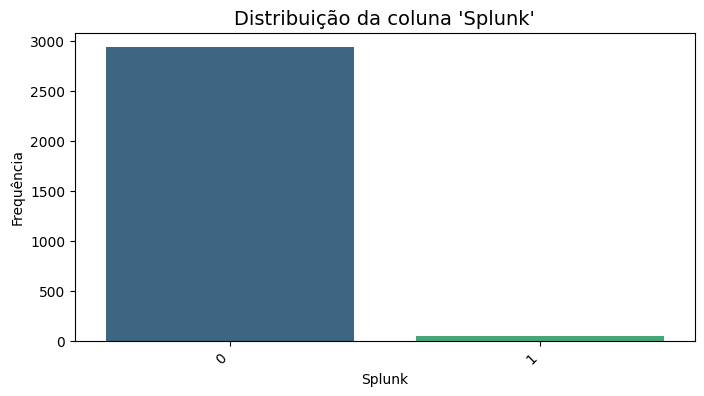

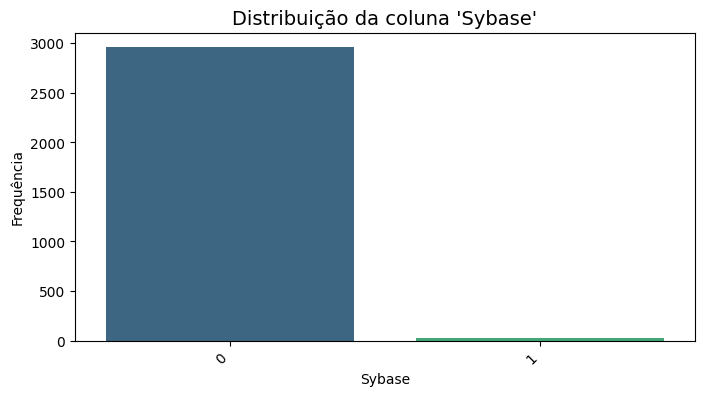

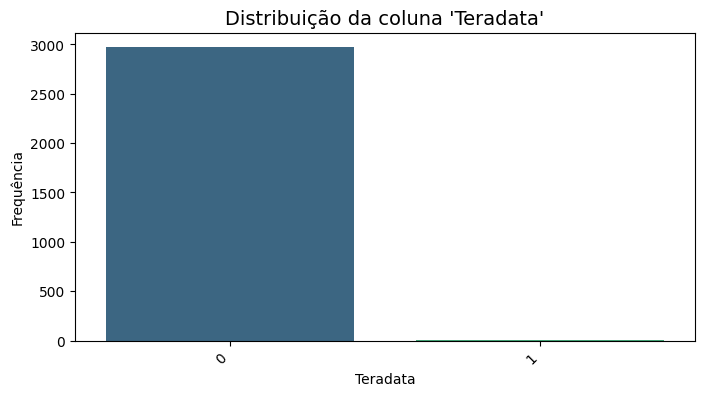

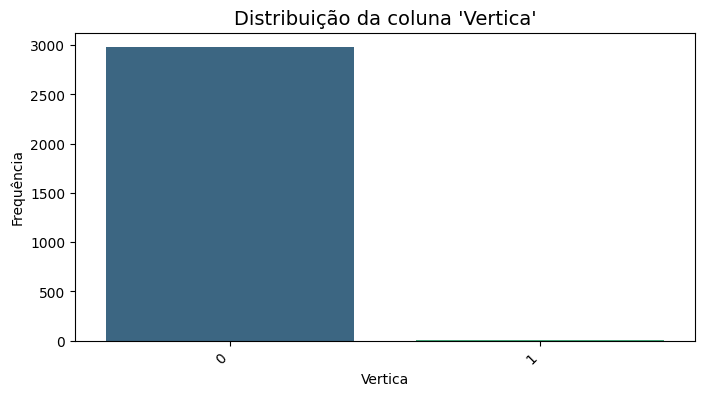

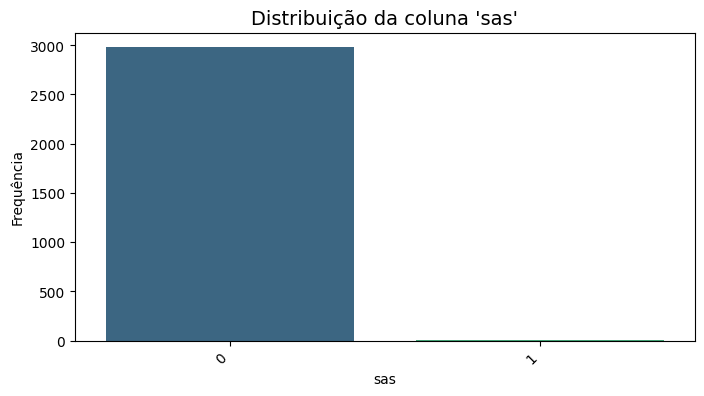

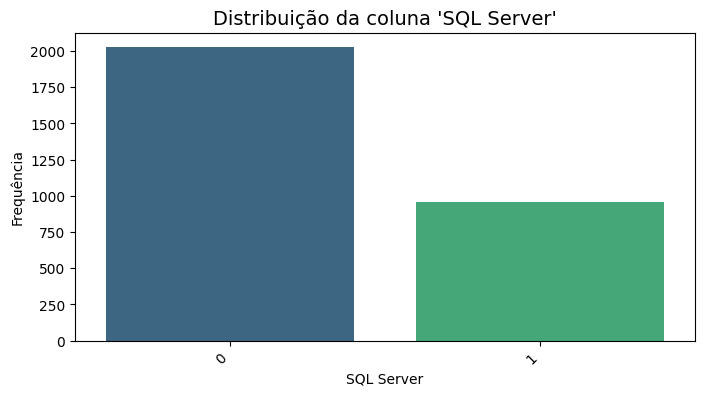

In [14]:
for col in dataset.columns:
    plt.figure(figsize=(8, 4))
    plt.title(f"Distribuição da coluna '{col}'", fontsize=14)

    if col == "idade":#pd.api.types.is_numeric_dtype(dataset[col]) and col != "vive_no_brasil":
        # Coluna numérica: histograma + boxplot
        # sns.histplot(dataset[col], 
        #              kde=True, 
        #              color="skyblue", 
        #              bins=20, 
        #              line_kws={"linewidth": 2, "color": "red"})
        sns.histplot(dataset[col], 
             color="skyblue", 
             bins=10, 
             stat="density")

        sns.kdeplot(dataset[col], 
                    color="red", 
                    linewidth=2)
        plt.xlabel(col)
        plt.ylabel("Frequência")
        plt.show()

    else:
        # Coluna categórica: barras de frequência
        sns.countplot(data=dataset,
                      x=col,
                      order=dataset[col].value_counts().index, 
                      palette="viridis",
                      hue=col,
                      legend=False,
                      dodge=False)
        plt.xticks(rotation=45, ha="right")
        plt.xlabel(col)
        plt.ylabel("Frequência")
        plt.show()

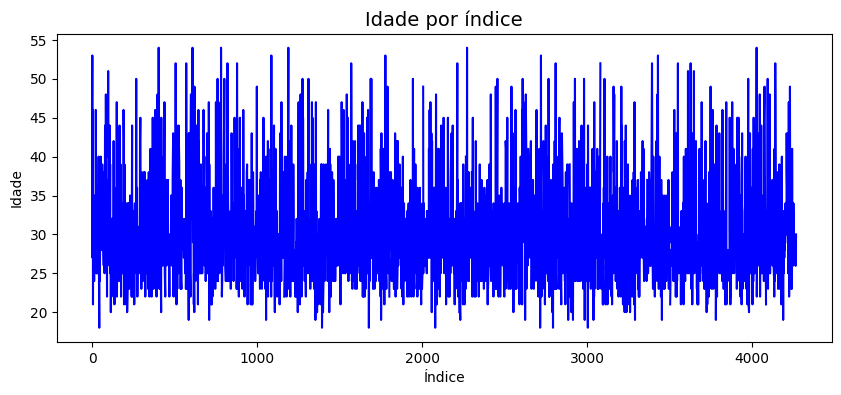

In [15]:
plt.figure(figsize=(10, 4))
plt.plot(dataset.index, dataset["idade"], linestyle="-", color="blue")
plt.title("Idade por índice", fontsize=14)
plt.xlabel("Índice")
plt.ylabel("Idade")
plt.show()

### Conclusões obtidas
Cargo, é o nosso target, removi todas as linhas em que esse valor estava ausente, eram cerca de 30% e, diversas outras colunas tinham valores ausentes nos mesmos pontos, levando isso em consideração eliminamos as linhas, já que para preencher seriam muitos dados artificiais adicionados ao dataset. 

Com relação aos valores ausentes restantes no dataset, após a exclusão das linhas em que o target tinha valores ausentes, as outras linhas apresentaram um número bem reduzido, chegando à no máximo 1,73%, então vale a pena aplicar um método de preenchimento nessas linhas.

Idade, possui 38 valores ausentes, alta correlação com o target e, está desbalanceada, com grande parte dos dados concentrados entre 20 a 30 anos, porém não possui outliers. Inicialmente, não pretendo alterar nada, só tratar os valores ausentes.

Gênero, possui 6 valores ausentes, associação de média a baixa com o target e, está desbalanceada, a maior parte dos que responderam são do gênero masculino, menos da metade são do gênero feminino, e apenas uma quantia ínfima preferiu não responder. Será que vale a pena passar os prefiro não dizer para feminino? Ou, eliminar a coluna já que a correlação não é forte? 

Etnia, não possui valores ausentes, associação baixa com o target e, está desbalanceda, a maior parte dos que responderam são brancos, pardos são menos da metade dos brancos, pretas são menos da metade dos pardos e continua assim por amarela, prefiro não informar e indigena. Minha ideia inicial é eliminar a coluna, está desbalanceda e possui baixa correlação com o target, não considero válido manter a coluna.

PCD, não possui valores ausentes, associação baixa com o target e, está desbalanceada, não vi o número em si, mas pelo gráfico cerca de 97% dos que responderam não possuem deficiência. Minha ideia inicial é eliminar a coluna, está desbalanceda e possui baixa correlação com o target, não considero válido manter a coluna.

Vive no Brasil, não possui valores ausentes, associação média com o target e, está desbalanceada, não vi o número em si, mas pelo gráfico cerca de 97% vivem no Brasil. Vou manter a coluna e verificar se os modelos sofrem uma perda de desempenho ao remover essa coluna.

Estado de moradia, possui 72 valores ausentes, associação de média para baixa com o target e, está desbalanceada, com gramde parte dos participantes da pesquisa residindo em São Paulo. Minha ideia inicial é eliminar a coluna, está desbalanceda e possui baixa correlação com o target, não considero válido manter a coluna. 

Nível de ensino, não possui valores ausentes, associação alta com o target e, está desbalanceada, porém não tanto quanto as outras. Vou só utilizar sem alterar nada inicialmente.

Formação, possui 74 valores ausentes, associação alta com o target e, não está tão desbalanceada, porém as linhas tem mais de uma formação. Será que vale a pena isolar as formação? No caso se a linha tiver CC e SI, eu duplico a linha e uma terá CC e outra SI, mas não tenho noção dos colaterais que serão ocasionados, pode valer a tentativa.

Tempo de experiência, não possui valores ausentes, possui a maior associação com o target, não está tão desbalaceda. Vou só utilizar sem alterar nada inicialmente.

Linguagens preferidas, possui 2 valores ausentes, associação média com o target, está desbalanceada, não vi o número, mas pelo gráfico imagino que pelo menos 80% utilizam Python. Pode ser interessante retirar essa coluna, vou testar com e sem ela.

Banco de dados, possui 3 valores ausentes, associação ínfima com o target e, os dados possuem uma quantia enorme de classificações. Preciso isolar os tipos de bancos de dados utilizados, para ter uma noção melhor, do jeito que está atualmente não consigo definir a relevância dessa coluna para o target.

Cloud preferida, não possui valores ausentes, associação média com o target e, os dados estão até que balanceados, só a categoria outros que não possui muitos valores. Vou utilizar sem alterar nada inicialmente.

# Tratamento dos Dados

In [16]:
dataset.keys()

Index(['idade', 'nivel_ensino', 'formacao', 'tempo_experiencia_dados', 'cargo',
       'API', 'Amazon Athena', 'Amazon Aurora ou RDS', 'Amazon Redshift',
       'Cassandra', 'DB2', 'Dados não estruturados', 'Databricks',
       'Databricks SQL', 'Datomic', 'DynamoDB', 'Elaticsearch', 'Firebase',
       'Firebird', 'Google Analytics', 'HBase', 'Hive', 'Interno', 'MariaDB',
       'Metabase', 'Microsoft Access', 'MongoDB', 'MySQL', 'NSA', 'Oracle',
       'Pesquisas empírica que eu coleto os dados', 'PostgreSQL', 'Presto',
       'RD STATION', 'Redis', 'S3', 'SAP HANA', 'SPSS', 'SQLite', 'Snowflake',
       'Splunk', 'Sybase', 'Teradata', 'Vertica', 'sas', 'SQL Server'],
      dtype='object')

In [17]:
y = dataset[target]  # Variável alvo (target)
X = dataset.drop(columns=[target])  # Todas as colunas EXCETO 'target'

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.20,  
    random_state=None  
)

In [19]:
num_features = []
cat_features = []

for col in X.columns:
    if col == "idade": #pd.api.types.is_numeric_dtype(dataset[col]) and col != "vive_no_brasil":
        # Coluna numérica: 
        num_features.append(col)
    else:
        # Coluna categórica: 
        cat_features.append(col)

In [20]:
RANDOM_STATE = 42

# Numéricas → imputação + escala
num_transformer = Pipeline(steps=[
    ("imputer", IterativeImputer(random_state=RANDOM_STATE)),  # ou KNNImputer
    ("scaler", StandardScaler())
])

# Categóricas → imputação + one-hot
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Preprocessor combinado
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features)
    ]
)

In [21]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [28]:
# =============================
# 4) Modelos
# =============================
RANDOM_STATE = 42

# Decision Tree
tree_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier(
        max_depth=6,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=RANDOM_STATE
    ))
])

# XGBoost
xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBClassifier(
        n_estimators=170,
        learning_rate=0.1,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=RANDOM_STATE,
        eval_metric="mlogloss"
    ))
])


=== Decision Tree ===
Accuracy : 0.33835845896147404
Precision: 0.3294955809992336
F1-Score : 0.2980017597477186

Classification Report:
                                                                      precision    recall  f1-score   support

                                          Analista de BI/BI Analyst       0.20      0.16      0.18        74
                                     Analista de Dados/Data Analyst       0.28      0.67      0.39       135
            Analista de Inteligência de Mercado/Market Intelligence       0.00      0.00      0.00         6
                                              Analista de Marketing       0.00      0.00      0.00         6
                              Analista de Negócios/Business Analyst       0.00      0.00      0.00        27
                               Analista de Suporte/Analista Técnico       0.00      0.00      0.00        14
                                                 Analytics Engineer       0.00      0.00      0.0

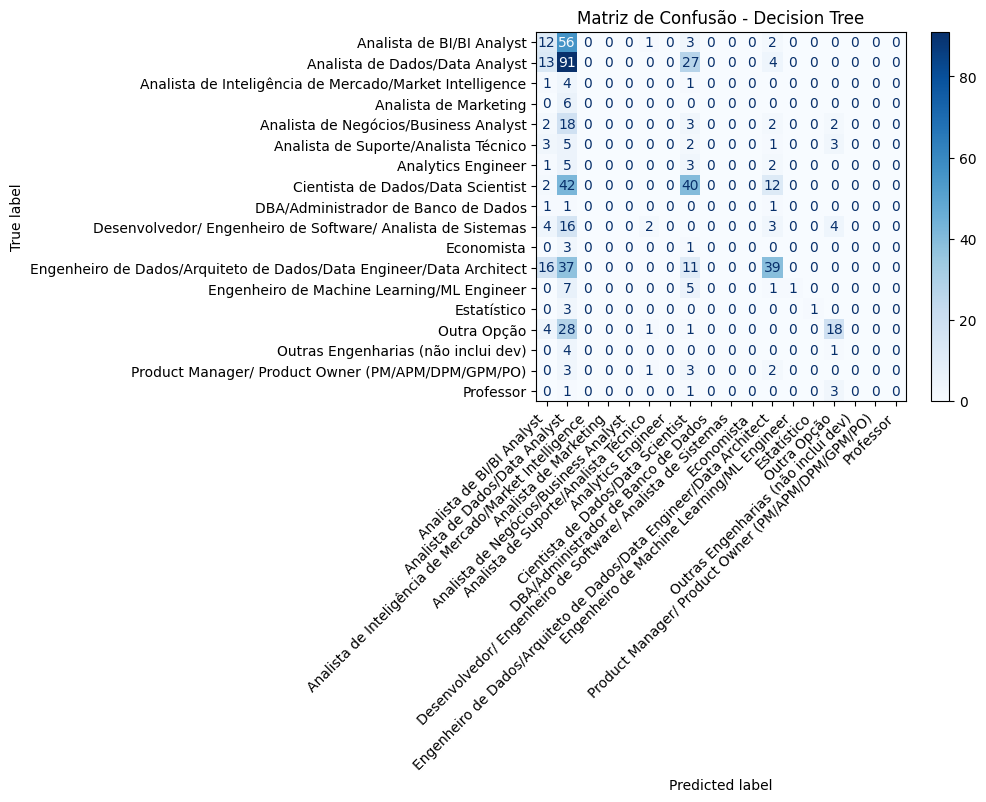


=== XGBoost ===
Accuracy : 0.3969849246231156
Precision: 0.35204536888514576
F1-Score : 0.36342764697702507

Classification Report:
                                                                      precision    recall  f1-score   support

                                          Analista de BI/BI Analyst       0.30      0.28      0.29        74
                                     Analista de Dados/Data Analyst       0.34      0.51      0.41       135
            Analista de Inteligência de Mercado/Market Intelligence       0.00      0.00      0.00         6
                                              Analista de Marketing       0.00      0.00      0.00         6
                              Analista de Negócios/Business Analyst       0.00      0.00      0.00        27
                               Analista de Suporte/Analista Técnico       0.25      0.07      0.11        14
                                                 Analytics Engineer       0.00      0.00      0.00    

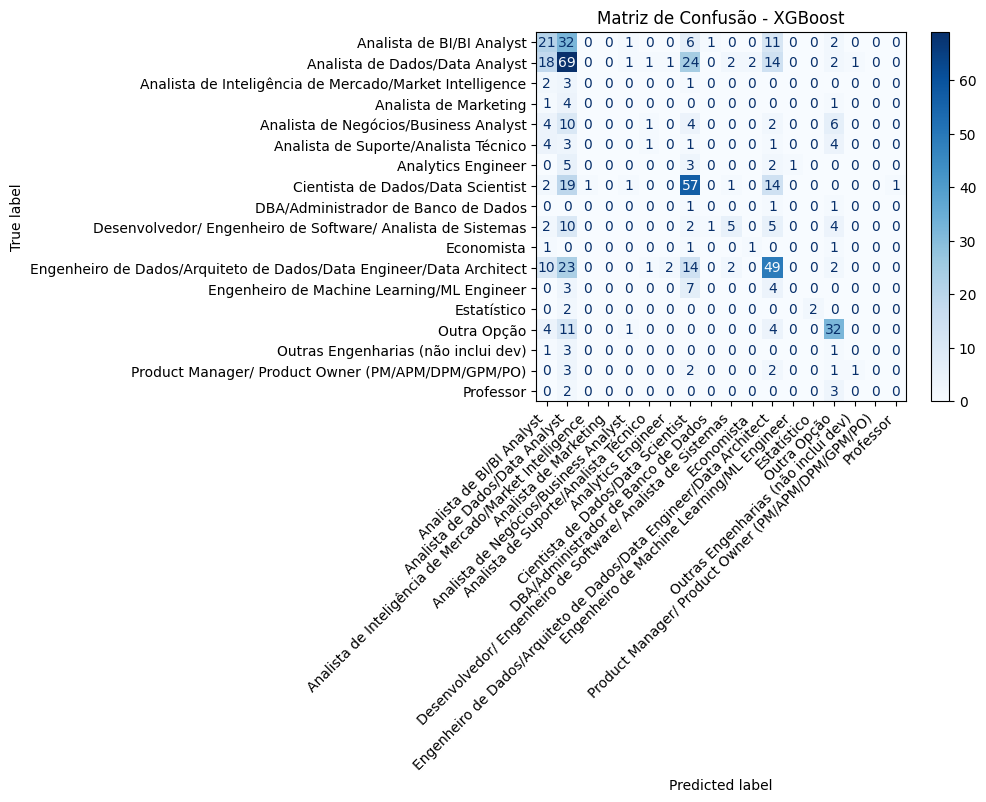

In [29]:
# =============================
# 5) Treino e Avaliação
# =============================
for name, model in [("Decision Tree", tree_pipeline), ("XGBoost", xgb_pipeline)]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n=== {name} ===")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average="weighted", zero_division=0))
    print("F1-Score :", f1_score(y_test, y_pred, average="weighted"))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))

    # --- Matriz de Confusão ---
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=le.classes_,
        cmap=plt.cm.Blues,
        normalize=None  #"true"
    )
    disp.ax_.set_title(f"Matriz de Confusão - {name}")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.show()